In [11]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [12]:
# Name of the CSV file
FL_retail_csv = os.path.join('Datasets','Florida Retail Data.csv')


In [13]:
# creating a data frame 
FL_df = pd.read_csv(FL_retail_csv)

In [14]:
# Delete extraneous column
FL_df = FL_df.drop(columns=['Geo Footnote', '2017 NAICS Footnote', 'id', '2017 NAICS code', 
                            'Annual payroll ($1,000)', 'First-quarter payroll ($1,000)', 
                            'Number of employees', 'Range indicating percent of total annual payroll imputed', 
                            'Range indicating percent of total employees imputed', 
                           ])


FL_df.head()

,Geographic Area Name,Meaning of NAICS code,Year,Number of firms,Number of establishments,"Sales, value of shipments, or revenue ($1,000)","Range indicating percent of total sales, value of shipments, or revenue imputed"
0,Florida,Retail trade,2017,47395,74496,333134553,Less than 10%
1,Florida,Motor vehicle and parts dealers,2017,5913,8575,89004633,10% to less than 20%
2,Florida,Furniture and home furnishings stores,2017,2609,3936,9512727,10% to less than 20%
3,Florida,Electronics and appliance stores,2017,1383,2137,8166697,Less than 10%
4,Florida,Building material and garden equipment and sup...,2017,3008,4231,21290242,Less than 10%


In [15]:
FL_df = FL_df.replace({'D': '0'})
FL_df

,Geographic Area Name,Meaning of NAICS code,Year,Number of firms,Number of establishments,"Sales, value of shipments, or revenue ($1,000)","Range indicating percent of total sales, value of shipments, or revenue imputed"
0,Florida,Retail trade,2017,47395,74496,333134553,Less than 10%
1,Florida,Motor vehicle and parts dealers,2017,5913,8575,89004633,10% to less than 20%
2,Florida,Furniture and home furnishings stores,2017,2609,3936,9512727,10% to less than 20%
3,Florida,Electronics and appliance stores,2017,1383,2137,8166697,Less than 10%
4,Florida,Building material and garden equipment and sup...,2017,3008,4231,21290242,Less than 10%
...,...,...,...,...,...,...,...
158,Florida,All other miscellaneous store retailers (excep...,2017,1705,1938,1515453,10% to less than 20%
159,Florida,Electronic shopping and mail-order houses,2017,3698,3751,24003758,20% to less than 30%
160,Florida,Vending machine operators,2017,325,351,350644,Less than 10%
161,Florida,Fuel dealers,2017,108,191,612076,Less than 10%


In [16]:
FL_df.loc[FL_df['Meaning of NAICS code']=='Electronic shopping and mail-order houses', 'eCommerce?']= 1
FL_df.loc[FL_df['Meaning of NAICS code']!='Electronic shopping and mail-order houses', 'eCommerce?']= 0

FL_df.head()

,Geographic Area Name,Meaning of NAICS code,Year,Number of firms,Number of establishments,"Sales, value of shipments, or revenue ($1,000)","Range indicating percent of total sales, value of shipments, or revenue imputed",eCommerce?
0,Florida,Retail trade,2017,47395,74496,333134553,Less than 10%,0.0
1,Florida,Motor vehicle and parts dealers,2017,5913,8575,89004633,10% to less than 20%,0.0
2,Florida,Furniture and home furnishings stores,2017,2609,3936,9512727,10% to less than 20%,0.0
3,Florida,Electronics and appliance stores,2017,1383,2137,8166697,Less than 10%,0.0
4,Florida,Building material and garden equipment and sup...,2017,3008,4231,21290242,Less than 10%,0.0


In [45]:
FL_df['Sales, value of shipments, or revenue ($1,000)'] = FL_df['Sales, value of shipments, or revenue ($1,000)'].astype(int)

In [46]:
my_results = FL_df.groupby('eCommerce?')['Sales, value of shipments, or revenue ($1,000)'].sum()
my_results

eCommerce?
0.0    1566677507
1.0      72011274
Name: Sales, value of shipments, or revenue ($1,000), dtype: int32

In [22]:
#Create Pie Chart
labels = "eCommerce", "Retail"
value = [my_results[1.0], my_results[0.0]]
colors = ["purple", "grey"]
explode = (0.3,0)

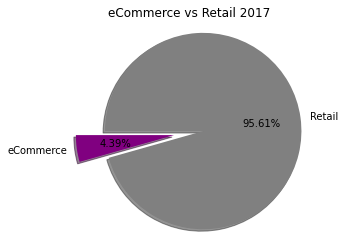

In [47]:
# Create a pie chart based upon the above data
plt.pie(value, labels=labels, colors=colors, explode=explode,
        autopct="%1.2f%%", shadow=True, startangle=180)
plt.title("eCommerce vs Retail 2017")

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()
#plt.savefig("../Images/PyPies.png")

In [24]:
#Number of Establishments

In [25]:
FL_df.loc[FL_df['Meaning of NAICS code']=='Electronic shopping and mail-order houses', 'eCommerce?']= 1
FL_df.loc[FL_df['Meaning of NAICS code']!='Electronic shopping and mail-order houses', 'eCommerce?']= 0

FL_df.head()

,Geographic Area Name,Meaning of NAICS code,Year,Number of firms,Number of establishments,"Sales, value of shipments, or revenue ($1,000)","Range indicating percent of total sales, value of shipments, or revenue imputed",eCommerce?
0,Florida,Retail trade,2017,47395,74496,333134553.0,Less than 10%,0.0
1,Florida,Motor vehicle and parts dealers,2017,5913,8575,89004633.0,10% to less than 20%,0.0
2,Florida,Furniture and home furnishings stores,2017,2609,3936,9512727.0,10% to less than 20%,0.0
3,Florida,Electronics and appliance stores,2017,1383,2137,8166697.0,Less than 10%,0.0
4,Florida,Building material and garden equipment and sup...,2017,3008,4231,21290242.0,Less than 10%,0.0


In [41]:
FL_df['Number of establishments'] = FL_df['Number of establishments'].astype(int)

In [42]:
FL_df.groupby('eCommerce?')['Number of establishments'].sum()

eCommerce?
0.0    359455
1.0     11253
Name: Number of establishments, dtype: int32